In [1]:
import json
import pandas as pd 

In [2]:
with open('D:/work_dir/Datasets/LoRa_anomaly-detection/range_based_positioning/results/pl_model_okumura_hata/2024-12-16_16-49/result.json', 'r') as file:
    r = json.load(file)

In [2]:
with open('D:/work_dir/Datasets/LoRa_anomaly-detection/range_based_positioning/results/pl_model_okumura_hata_suburban/2024-12-17_15-57/result.json', 'r') as file:
    r = json.load(file)

In [3]:
r2 = pd.read_json('D:/work_dir/Datasets/LoRa_anomaly-detection/range_based_positioning/results/pl_model_okumura_hata/2024-12-16_16-49/result.json')

In [4]:
r2 = pd.read_json('D:/work_dir/Datasets/LoRa_anomaly-detection/range_based_positioning/results/pl_model_okumura_hata_suburban/2024-12-17_15-57/result.json')

<Axes: ylabel='Estimation Error'>

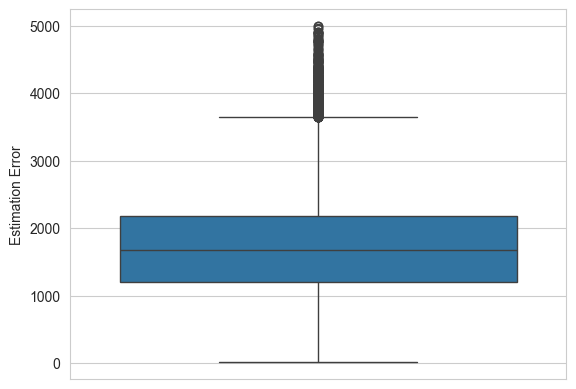

In [5]:
import seaborn as sns

est_errors = r2['Estimation Error'].dropna()

sns.boxplot(est_errors[est_errors < 5000], native_scale=True)

C:\Users\Sudip Barua\AppData\Local\Temp\ipykernel_12172\918268903.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(est_errors[est_errors < 5000])


<Axes: xlabel='Estimation Error', ylabel='Density'>

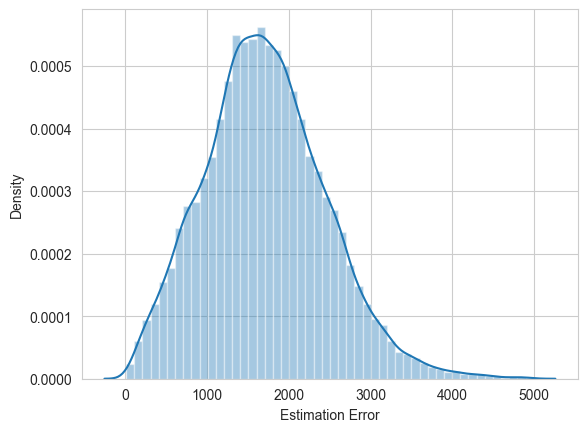

In [6]:
sns.distplot(est_errors[est_errors < 5000])

<Axes: xlabel='Estimation Error', ylabel='Count'>

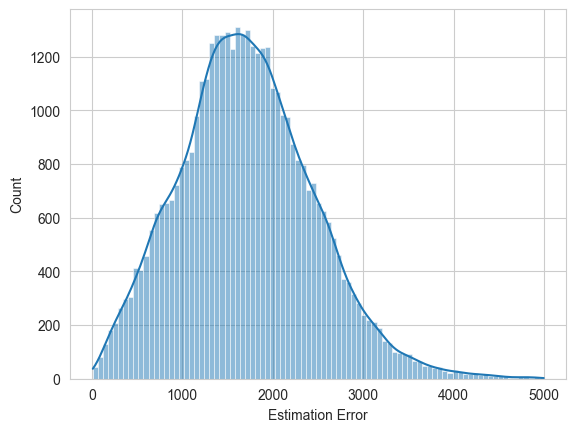

In [7]:
sns.histplot(est_errors[est_errors < 5000], kde=True)

<Axes: ylabel='Estimation Error'>

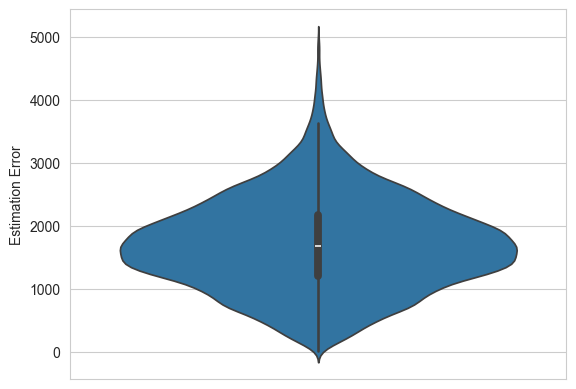

In [8]:
sns.violinplot(est_errors[est_errors < 5000])

In [9]:
print('Estimation error')
print(f'        Mean: {est_errors.mean()}')
print(f'      Median: {est_errors.median()}')
print(f'         Max: {est_errors.max()}')
print(f'         Min: {est_errors.min()}')


Estimation error
        Mean: 101861.613633335
      Median: 1976.1658259752126
         Max: 1780181.4822435162
         Min: 11.032479220512533


In [20]:
r2['Estimation Error'].dropna()

0           638.086134
1          1203.774963
2           326.657589
3        138385.208116
4           700.286566
             ...      
55371    455114.845942
55372    148526.811618
55373       742.780599
55374      1355.373392
55375      1112.914194
Name: Estimation Error, Length: 55074, dtype: float64

In [19]:
r2['Estimation Error']


0           638.086134
1          1203.774963
2           326.657589
3        138385.208116
4           700.286566
             ...      
55371    455114.845942
55372    148526.811618
55373       742.780599
55374      1355.373392
55375      1112.914194
Name: Estimation Error, Length: 55376, dtype: float64

In [10]:
est_er = est_errors[est_errors < 5000]
print('Estimation error')
print(f'        Mean: {est_er.mean()}')
print(f'      Median: {est_er.median()}')
print(f'         Max: {est_er.max()}')

Estimation error
        Mean: 1712.1601171287061
      Median: 1675.2603770683074
         Max: 4994.956585673771


In [37]:
import sys
sys.path.append('D:/work_dir/Datasets/LoRa_anomaly-detection')
from general_functions import *   # We are going to use the 'map_plot_cartopy' method 

In [52]:
data = r[1]

In [53]:
rows = []
# Add the estimated position
rows.append({'lat': data['lat'], 'lon': data['lon'], 'cat': 'Actual Pos'})
rows.append({'lat': data['lat_est'], 'lon': data['lon_est'], 'cat': 'Estimated Pos'})

# Add the gateway positions
for key, value in data.items():
    if key.startswith('gw_'):
        rows.append({'lat': value['lat'], 'lon': value['lon'], 'cat': 'GW Positions'})


In [55]:
pd.DataFrame(rows)

,lat,lon,cat
0,51.208565,4.400576,Actual Pos
1,51.208150,4.417843,Estimated Pos
2,51.205795,4.398465,GW Positions
3,51.197487,4.406706,GW Positions
4,51.218227,4.400960,GW Positions
5,51.201900,4.395436,GW Positions
